In [1]:
import pandas as pd
import numpy as  np
import  warnings
warnings.filterwarnings('ignore')
import seaborn as  sns
import matplotlib.pyplot as  plt 
pd.set_option('display.max_column',None)

# Reading the data

In [2]:
df_train=pd.read_csv(r'C:\Users\Lenovo\Desktop\Hackathon-Analytics_vidhya\train_s3TEQDk.csv',header=0,index_col=0)
df_train


,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0


In [50]:
# understanding the Training data 
print(df_train.shape)
print(df_train.dtypes)

print(df_train.info())

(245725, 10)
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 245725 entries, NNVBBKZB to BOCZSWLJ
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_

In [3]:
df_train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [4]:
a=['Gender','Region_Code','Occupation','Channel_Code', 'Vintage','Credit_Product','Is_Active','Is_Lead']
for i in a:
    print(df_train[i].unique())

['Female' 'Male']
['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
['X3' 'X1' 'X2' 'X4']
[ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 110  44   9
  68  51  98 105 127 129 133   8   7 128 135 134]
['No' nan 'Yes']
['No' 'Yes']
[0 1]


## EXPLORATORY DATA ANALYSIS

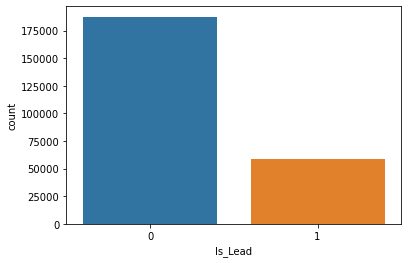

In [70]:
# cheking for  biasness  in data
sns.countplot(df_train.Is_Lead)
plt.show()

Insight - The Data set  is  heavily  biased towards  people  not  interested in credit card

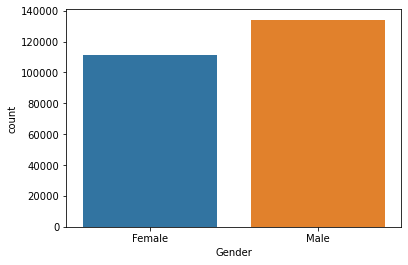

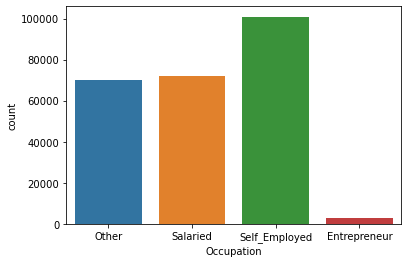

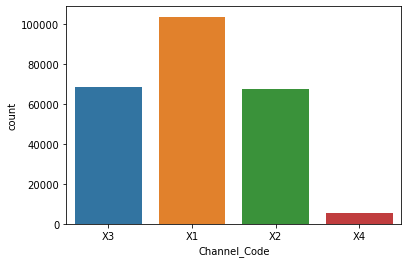

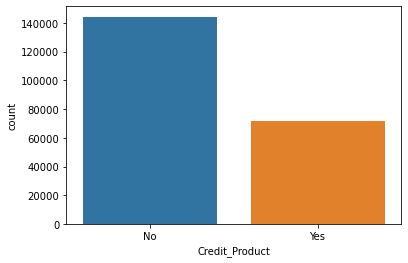

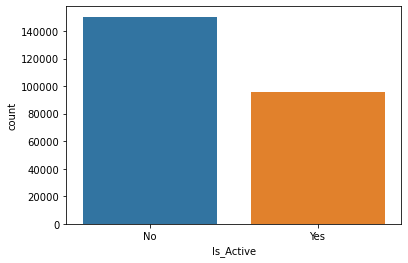

In [71]:
a=['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']
for i in a:
    sns.countplot(df_train[i])
    plt.show()

Insight- There  are  lesser customers through channel code X4 and customers with occupation as Entrepreneur

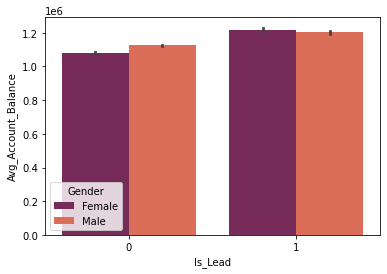

In [53]:
# Gender
sns.barplot(x='Is_Lead',y='Avg_Account_Balance',data=df_train,palette='rocket',hue='Gender')
plt.show()

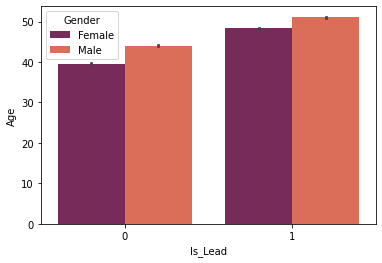

In [10]:
sns.barplot(x='Is_Lead',y='Age',data=df_train,palette='rocket',hue='Gender')
plt.show()

 Insight- There  is no difference in the  interest  of credit card  based  on Gender . 

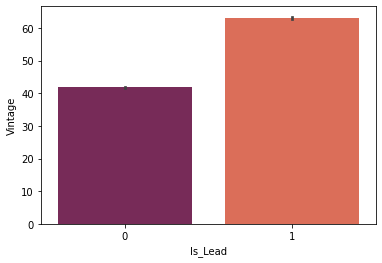

In [74]:
#Vintage
sns.barplot(x='Is_Lead',y='Vintage',data=df_train,palette='rocket')
plt.show()

Insight -Customers with longer relationship with bank  are more  interested  in credit card .

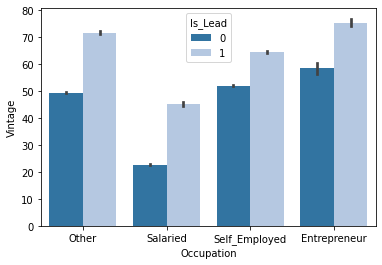

In [75]:
#Occupation
sns.barplot(x='Occupation',y='Vintage',data=df_train,palette='tab20',hue='Is_Lead')
plt.show()

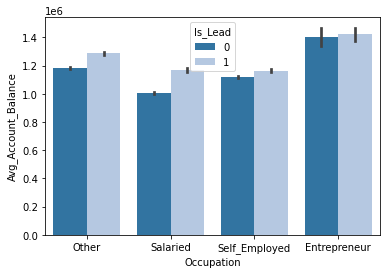

In [13]:

sns.barplot(x='Occupation',y='Avg_Account_Balance',data=df_train,palette='tab20',hue='Is_Lead')
plt.show()

Insight - Salaried customers  recently joined with the  bank have the  least  interest in credit cards . While Entrepreneurs ,Other and Self_Employed with longer relationship with the  bank are  more  interested in availing credit cards.

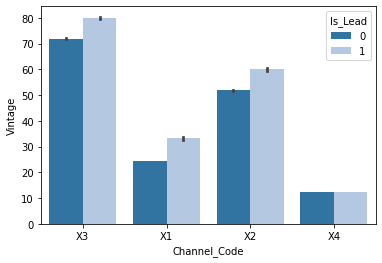

In [76]:
# Vintage and Channel_code
sns.barplot(x='Channel_Code',y='Vintage',data=df_train,hue='Is_Lead',palette='tab20')
plt.show()

Insight- Customers with channel code X4  seems  to  have the least interest for credit cards , while Customers with channel code X3 seems  to have more  interest for credit cards

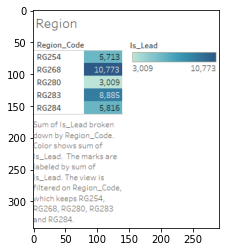

In [77]:
#Region 
import matplotlib.image as mpimg
img = mpimg.imread('Region_3.png')
plt.imshow(img)

Insight  - Region with code 268  has more customers who are intersted in credit cards.

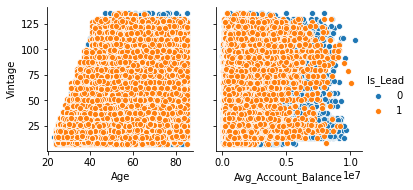

In [78]:
sns.pairplot(x_vars=["Age","Avg_Account_Balance"],y_vars='Vintage',data=df_train,hue='Is_Lead')
plt.show()

# Handling Missing Values in training data

In [5]:
# checking for  other  missing values 
df_train.isnull().sum().sort_values(ascending=False)

Credit_Product         29325
Is_Lead                    0
Is_Active                  0
Avg_Account_Balance        0
Vintage                    0
Channel_Code               0
Occupation                 0
Region_Code                0
Age                        0
Gender                     0
dtype: int64

In [6]:
#Mapping Credit_Product  variable  -No with 0 and  Yes with 1 
df_train.Credit_Product=df_train.Credit_Product.map({'No':0,'Yes':1})
print(df_train)

          Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
ID                                                                       
NNVBBKZB  Female   73       RG268          Other           X3       43   
IDD62UNG  Female   30       RG277       Salaried           X1       32   
HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
BF3NC7KV    Male   34       RG270       Salaried           X1       19   
TEASRWXV  Female   30       RG282       Salaried           X1       33   
...          ...  ...         ...            ...          ...      ...   
BPAWWXZN    Male   51       RG284  Self_Employed           X3      109   
HFNB7JY8    Male   27       RG268       Salaried           X1       15   
GEHAUCWT  Female   26       RG281       Salaried           X1       13   
GE7V8SAH  Female   28       RG273       Salaried           X1       31   
BOCZSWLJ    Male   29       RG269       Salaried           X1       21   

          Credit_Product  Avg_Account

In [7]:
#Assuming customer has  credit_products availed so as to consider all the customers  interested in credit cards
df_train.Credit_Product.fillna(1,inplace=True)

In [8]:
df_train.isnull().sum().sort_values(ascending=False)

Is_Lead                0
Is_Active              0
Avg_Account_Balance    0
Credit_Product         0
Vintage                0
Channel_Code           0
Occupation             0
Region_Code            0
Age                    0
Gender                 0
dtype: int64

# Converting Categorical data 

In [9]:
from sklearn.preprocessing import LabelEncoder
colname=['Gender','Region_Code', 'Occupation', 'Channel_Code','Credit_Product','Is_Active']

le=LabelEncoder()

for i in colname:
 df_train[i]=le.fit_transform(df_train[i])

In [10]:
df_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0
IDD62UNG,0,30,27,2,0,32,0,581988,0,0
HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0
BF3NC7KV,1,34,20,2,0,19,0,470454,0,0
TEASRWXV,0,30,32,2,0,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...
BPAWWXZN,1,51,34,3,2,109,1,1925586,0,0
HFNB7JY8,1,27,18,2,0,15,0,862952,1,0
GEHAUCWT,0,26,31,2,0,13,0,670659,0,0


In [11]:
df_train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

# Upsampling the data in order to remove the  biasness

In [12]:
df_train.majority=df_train[df_train.Is_Lead==0]
df_train.minority=df_train[df_train.Is_Lead==1]
print(df_train.majority.shape)
print(df_train.minority.shape)

(187437, 10)
(58288, 10)


In [13]:
from sklearn.utils import resample
df_train.minority_upsampled =resample(df_train.minority, replace=True,     
                                 n_samples=187437,
                                 random_state=10)

In [14]:
df_upsampled = pd.concat([df_train.majority, df_train.minority_upsampled])
df_upsampled.shape

(374874, 10)

#  X and Y Variables

In [15]:
X=df_upsampled.values[:,0:-1]
Y=df_upsampled.values[:,-1]
Y=Y.astype(int)

In [16]:
print(X.shape)
print(Y.shape)

(374874, 9)
(374874,)


# Scaling the data

In [17]:
#Standarizing the X variables 
from sklearn.preprocessing import StandardScaler 
Scaler=StandardScaler()
Scaler.fit(X)
X=Scaler.transform(X)
print(X)

[[-1.14797338  1.86223981 -0.21200597 ... -1.10986696 -0.12933911
  -0.84129449]
 [-1.14797338 -1.10425204  0.6180208  ... -1.10986696 -0.66925949
  -0.84129449]
 [-1.14797338  0.68944071 -0.21200597 ... -1.10986696  0.38136879
   1.18864443]
 ...
 [-1.14797338  0.41348798 -0.21200597 ...  0.90100889  0.58223038
   1.18864443]
 [ 0.87110034  1.17235798  1.17137198 ... -1.10986696 -0.49114356
   1.18864443]
 [-1.14797338 -0.55234658 -0.21200597 ...  0.90100889  0.5903436
   1.18864443]]


# Train_Test_Split the Training Data  For Evaluation

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=10)

In [19]:
print(X_train.shape)
print(Y_test.shape)

(299899, 9)
(74975,)


# Logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred) 
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[26670 10804]
 [ 6885 30616]]
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.71      0.75     37474
           1       0.74      0.82      0.78     37501

    accuracy                           0.76     74975
   macro avg       0.77      0.76      0.76     74975
weighted avg       0.77      0.76      0.76     74975

Accuracy of the model:  0.7640680226742247


In [25]:
#Tuning Logistic Regression Model
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.7605813  0.2394187 ]
 [0.63194248 0.36805752]
 [0.88577885 0.11422115]
 ...
 [0.89173851 0.10826149]
 [0.22781931 0.77218069]
 [0.66420774 0.33579226]]


In [28]:
for a in np.arange(0.3,0.71,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0] 
    cfm[1,0]," , type 1 error:", cfm[0,1]

In [29]:
#Considering  the  least Type 2 error  a t  0.3  , as  we  want as many  customers who are  interested  in credit card  
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.30:
        y_pred_class.append(1)
    else:
         y_pred_class.append(0)


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class) 
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[22487 14987]
 [ 4719 32782]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.60      0.70     37474
           1       0.69      0.87      0.77     37501

    accuracy                           0.74     74975
   macro avg       0.76      0.74      0.73     74975
weighted avg       0.76      0.74      0.73     74975

Accuracy of the model:  0.7371657219073025


# KNN 

In [102]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[23957 13517]
 [ 8883 28618]]

Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.64      0.68     37474
           1       0.68      0.76      0.72     37501

    accuracy                           0.70     74975
   macro avg       0.70      0.70      0.70     74975
weighted avg       0.70      0.70      0.70     74975

Accuracy of the model:  0.7012337445815272


In [ ]:
#Tuning KNN 

In [104]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='manhattan')

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[24262 13212]
 [ 8947 28554]]

Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.65      0.69     37474
           1       0.68      0.76      0.72     37501

    accuracy                           0.70     74975
   macro avg       0.71      0.70      0.70     74975
weighted avg       0.71      0.70      0.70     74975

Accuracy of the model:  0.7044481493831277


In [109]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=2,metric='manhattan')

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[30929  6545]
 [ 5881 31620]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83     37474
           1       0.83      0.84      0.84     37501

    accuracy                           0.83     74975
   macro avg       0.83      0.83      0.83     74975
weighted avg       0.83      0.83      0.83     74975

Accuracy of the model:  0.8342647549183061


In [107]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=1,metric='manhattan')

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[29832  7642]
 [ 1614 35887]]

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     37474
           1       0.82      0.96      0.89     37501

    accuracy                           0.88     74975
   macro avg       0.89      0.88      0.88     74975
weighted avg       0.89      0.88      0.88     74975

Accuracy of the model:  0.8765455151717239


# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 1 1]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[30796  6678]
 [ 1412 36089]]

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     37474
           1       0.84      0.96      0.90     37501

    accuracy                           0.89     74975
   macro avg       0.90      0.89      0.89     74975
weighted avg       0.90      0.89      0.89     74975

Accuracy of the model:  0.8920973657885962


# Tuning the Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",min_samples_leaf=5)
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 1 0]


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[29813  7661]
 [ 5911 31590]]

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81     37474
           1       0.80      0.84      0.82     37501

    accuracy                           0.82     74975
   macro avg       0.82      0.82      0.82     74975
weighted avg       0.82      0.82      0.82     74975

Accuracy of the model:  0.8189796598866289


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=30, random_state=10) 

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[32150  5324]
 [ 1192 36309]]

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     37474
           1       0.87      0.97      0.92     37501

    accuracy                           0.91     74975
   macro avg       0.92      0.91      0.91     74975
weighted avg       0.92      0.91      0.91     74975

Accuracy of the model:  0.9130910303434479


# Tuning Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=30, random_state=10,min_samples_leaf=2) 

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[31406  6068]
 [ 2220 35281]]

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     37474
           1       0.85      0.94      0.89     37501

    accuracy                           0.89     74975
   macro avg       0.89      0.89      0.89     74975
weighted avg       0.89      0.89      0.89     74975

Accuracy of the model:  0.8894564854951651


# SGD Classifier

In [36]:
from sklearn.linear_model import SGDClassifier

classifier_SGD=SGDClassifier(loss="log",random_state=10,alpha=0.001,max_iter=1000, shuffle=True,
early_stopping=True,n_iter_no_change=3)
classifier_SGD.fit(X_train,Y_train)

Y_pred=classifier_SGD.predict(X_test)




In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[26673 10801]
 [ 6873 30628]]

Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.71      0.75     37474
           1       0.74      0.82      0.78     37501

    accuracy                           0.76     74975
   macro avg       0.77      0.76      0.76     74975
weighted avg       0.77      0.76      0.76     74975

Accuracy of the model:  0.7642680893631211


# Ensemble model

In [80]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

# create the sub models
estimators = []

model1 = DecisionTreeClassifier(criterion='gini',random_state=10)
estimators.append(('cart', model1))
model2 = RandomForestClassifier(n_estimators=30, random_state=10) 
estimators.append(('Random_Forest', model2))
model3 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
estimators.append(('knn', model3))

In [81]:
ensemble = VotingClassifier(estimators)   
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 1 1]


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[32187  5287]
 [ 1252 36249]]

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     37474
           1       0.87      0.97      0.92     37501

    accuracy                           0.91     74975
   macro avg       0.92      0.91      0.91     74975
weighted avg       0.92      0.91      0.91     74975

Accuracy of the model:  0.9127842614204735


# XG BOOST

In [38]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:

from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='error')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 1 0]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[29654  7820]
 [ 7398 30103]]

Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     37474
           1       0.79      0.80      0.80     37501

    accuracy                           0.80     74975
   macro avg       0.80      0.80      0.80     74975
weighted avg       0.80      0.80      0.80     74975

Accuracy of the model:  0.7970256752250751


# Reading the Training File

In [22]:
df_test=pd.read_csv(r'C:\Users\Lenovo\Desktop\Hackathon-Analytics_vidhya\test_mSzZ8RL.csv',header=0,index_col=0)
df_test

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...
DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No


# Handling Missing Values in testing data

In [23]:
# checking for  other  missing values 
df_test.isnull().sum().sort_values(ascending=False)

Credit_Product         12522
Is_Active                  0
Avg_Account_Balance        0
Vintage                    0
Channel_Code               0
Occupation                 0
Region_Code                0
Age                        0
Gender                     0
dtype: int64

In [179]:
#Mapping Credit_Product  variable  -No with 0 and  Yes with 1 
df_test.Credit_Product=df_test.Credit_Product.map({'No':0,'Yes':1})
print(df_test)

          Gender  Age Region_Code Occupation Channel_Code  Vintage  \
ID                                                                   
VBENBARO    Male   29       RG254      Other           X1       25   
CCMEWNKY    Male   43       RG268      Other           X2       49   
VK3KGA9M    Male   31       RG270   Salaried           X1       14   
TT8RPZVC    Male   29       RG272      Other           X1       33   
SHQZEYTZ  Female   29       RG270      Other           X1       19   
...          ...  ...         ...        ...          ...      ...   
DBENJOYI    Male   52       RG268   Salaried           X2       86   
CWQ72DWS    Male   55       RG277      Other           X2       86   
HDESC8GU    Male   35       RG254   Salaried           X4       15   
2PW4SFCA    Male   53       RG254      Other           X3       93   
F2NOYPPZ    Male   27       RG256   Salaried           X1       21   

          Credit_Product  Avg_Account_Balance Is_Active  
ID                             

In [24]:
#Assuming customer has  credit_products availed so as to consider all customers interested  in credit card
df_test.Credit_Product.fillna(1,inplace=True)

In [25]:
df_test.isnull().sum().sort_values(ascending=False)

Is_Active              0
Avg_Account_Balance    0
Credit_Product         0
Vintage                0
Channel_Code           0
Occupation             0
Region_Code            0
Age                    0
Gender                 0
dtype: int64

In [26]:
df_test.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [27]:
a=['Gender','Region_Code','Occupation','Channel_Code', 'Vintage','Credit_Product','Is_Active']
for i in a:
    print(df_test[i].unique())

['Male' 'Female']
['RG254' 'RG268' 'RG270' 'RG272' 'RG253' 'RG257' 'RG284' 'RG283' 'RG277'
 'RG273' 'RG261' 'RG280' 'RG274' 'RG278' 'RG269' 'RG281' 'RG251' 'RG252'
 'RG279' 'RG282' 'RG262' 'RG263' 'RG264' 'RG256' 'RG265' 'RG260' 'RG258'
 'RG271' 'RG250' 'RG275' 'RG276' 'RG267' 'RG255' 'RG259' 'RG266']
['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
['X1' 'X2' 'X3' 'X4']
[ 25  49  14  33  19 110  67  81  37  63  69  27  31  21 117  93  92  85
 103  26  55  13  80  44  39  99  91 115  15  20 105   8  32  51  62  57
  98  68  97 122 111  75  50  43  45  86 123  61 134  87  38  79 104   7
  56  73 116  74 109 128   9 127 121 129 133 135]
['Yes' 1 'No']
['No' 'Yes']


# Converting Categorical Data into Numerical in testing data

In [184]:
from sklearn.preprocessing import LabelEncoder
colname=['Gender','Region_Code', 'Occupation', 'Channel_Code','Credit_Product','Is_Active']

le=LabelEncoder()

for i in colname:
 df_test[i]=le.fit_transform(df_test[i])
print(df_test)

          Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
ID                                                                      
VBENBARO       1   29            4           1             0       25   
CCMEWNKY       1   43           18           1             1       49   
VK3KGA9M       1   31           20           2             0       14   
TT8RPZVC       1   29           22           1             0       33   
SHQZEYTZ       0   29           20           1             0       19   
...          ...  ...          ...         ...           ...      ...   
DBENJOYI       1   52           18           2             1       86   
CWQ72DWS       1   55           27           1             1       86   
HDESC8GU       1   35            4           2             3       15   
2PW4SFCA       1   53            4           1             2       93   
F2NOYPPZ       1   27            6           2             0       21   

          Credit_Product  Avg_Account_Balance  Is_

# Splitting the Training and Testing Data

In [185]:
X_train=df_upsampled.values[:,0:-1]
Y_train=df_upsampled.values[:,-1]
Y_train=Y_train.astype(int)

In [186]:
print(X_train.shape)
print(Y_train.shape)

(374874, 9)
(374874,)


In [187]:
X_test=df_test.values[:,:]
print(X_test.shape)

(105312, 9)


# Scaling the data


In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [189]:
print(X_train)
print(X_test)

[[-1.14797338  1.86223981 -0.21200597 ... -1.10986696 -0.12933911
  -0.84129449]
 [-1.14797338 -1.10425204  0.6180208  ... -1.10986696 -0.66925949
  -0.84129449]
 [-1.14797338  0.68944071 -0.21200597 ... -1.10986696  0.38136879
   1.18864443]
 ...
 [-1.14797338  0.41348798 -0.21200597 ...  0.90100889  0.58223038
   1.18864443]
 [ 0.87110034  1.17235798  1.17137198 ... -1.10986696 -0.49114356
   1.18864443]
 [-1.14797338 -0.55234658 -0.21200597 ...  0.90100889  0.5903436
   1.18864443]]
[[ 0.87110034 -1.17324023 -1.50315872 ... -1.10986696 -0.48252268
  -0.84129449]
 [ 0.87110034 -0.20740567 -0.21200597 ... -1.10986696 -0.26924675
  -0.84129449]
 [ 0.87110034 -1.03526386 -0.02755557 ... -1.10986696 -1.09545855
  -0.84129449]
 ...
 [ 0.87110034 -0.75931113 -1.50315872 ... -1.10986696  0.63684209
  -0.84129449]
 [ 0.87110034  0.48247616 -1.50315872 ... -1.10986696 -0.48856335
   1.18864443]
 [ 0.87110034 -1.31121659 -1.31870832 ... -1.10986696 -0.65810847
  -0.84129449]]


# The chosen model 

While evaluating the model with the Training data – KNN, Random 
Forest and Decision Tree performed with good accuracy and recall values 
for both classes 
However while applying it to the test data , LR and XGB models 
performed better. 
-XGB Model performed both in Testing and Training data well. Hence 
used that model.

# xgboost

In [210]:
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='error')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [211]:
df_test['Is_Lead']=Y_pred

In [212]:
df_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
VBENBARO,1,29,4,1,0,25,0,742366,0,0
CCMEWNKY,1,43,18,1,1,49,0,925537,0,0
VK3KGA9M,1,31,20,2,0,14,0,215949,0,0
TT8RPZVC,1,29,22,1,0,33,0,868070,0,0
SHQZEYTZ,0,29,20,1,0,19,0,657087,0,0


In [213]:
df_test.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [214]:
df_output=df_test.drop(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage','Credit_Product', 'Avg_Account_Balance', 'Is_Active'],axis=1)

In [215]:
df_output.head()

,Is_Lead
ID,
VBENBARO,0
CCMEWNKY,0
VK3KGA9M,0
TT8RPZVC,0
SHQZEYTZ,0


In [216]:
df_output.to_csv(r'C:\Users\Lenovo\Desktop\Hackathon-Analytics_vidhya\XGB_Final_credit_card.csv',header=True,index=True)